# Guided Project: Predicting Employee Productivity Using Tree Models

### Objective:
* The primary objective of this project is to develop a predictive model that can accurately classify or predict the productivity performance of garment employees based on various features provided in the dataset.
* date: Date in MM-DD-YYYY
* day:Day of the Week
* quarter:A portion of the month. A month was divided into four quarters
* department:Associated department with the instance
* team_no:Associated team number with the instance
* no_of_workers:Number of workers in each team
* no_of_style_change:Number of changes in the style of a particular product
* targeted_productivity:Targeted productivity set by the Authority for each team for each day.
* smv:Standard Minute Value, it is the allocated time for a task
* wip:Work in progress. Includes the number of unfinished items for products
* over_time:Represents the amount of overtime by each team in minutes
* incentive:Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* idle_time:The amount of time when the production was interrupted due to several reasons
* idle_men:The number of workers who were idle due to production interruption
* actual_productivity:The actual % of productivity that was delivered by the workers. It ranges from 0-1.

## 1. Data Exploration

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
# Get the shape of the dataset
df.shape

(1197, 15)

In [5]:
# Inspect the dataset using info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
# Describe the dataset using describe() method
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [7]:
# Explore the columns
print('Column Data Types:\n', df.dtypes)

Column Data Types:
 date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [8]:
# Check the missing value
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

##### Observation:
* There are 1197 rows and 15 columns in the dataset.
* The 'wip' column is the only one containing null values in the dataset.
* The 'targeted_productivity' column ranges from 0.07 to 0.80, witha mean of approximately 0.73.

In [9]:
# Compare relevant columns
relavant_columns = ['targeted_productivity', 'actual_productivity']
print('\nComparison of Relevant Columns: ')
print(df[relavant_columns].describe())


Comparison of Relevant Columns: 
       targeted_productivity  actual_productivity
count            1197.000000          1197.000000
mean                0.729632             0.735091
std                 0.097891             0.174488
min                 0.070000             0.233705
25%                 0.700000             0.650307
50%                 0.750000             0.773333
75%                 0.800000             0.850253
max                 0.800000             1.120437


##### Observations:
* The mean of 'actual_productivity'(0.735) is slightly higher than the mean of 'targeted_productivity'(0.730).

In [10]:
print('\nComparison of Relevant Columns: ')
print(df[['smv', 'over_time']].describe())


Comparison of Relevant Columns: 
               smv     over_time
count  1197.000000   1197.000000
mean     15.062172   4567.460317
std      10.943219   3348.823563
min       2.900000      0.000000
25%       3.940000   1440.000000
50%      15.260000   3960.000000
75%      24.260000   6960.000000
max      54.560000  25920.000000


##### Observations:
* The mean 'smv' is approximately  15.06, indicating the average allocated time for a task.
* The 'smv' ranges from 2.9 to 54.56, with a standard deviation of approximately 10.94.
* The mean 'over_time' is 4567.46, indicating the average amount of overtime by each team.

## 2. Data Cleaning

In [11]:
# Examine the value counts for the department column
department_count = df['department'].apply(lambda x: (x, len(x)))
print('Value Counts for Department Column:')
print(department_count.value_counts())

Value Counts for Department Column:
(sweing, 6)         691
(finishing , 10)    257
(finishing, 9)      249
Name: department, dtype: int64


##### Observations:
* The 'department' column contains variations in department names due to inconsistent spacing, particularly in the 'finishing' department.
* Some entries have a space after the department name, while ohters do not.

In [12]:
# Fix the observations by removing trailing whitespaces
df['department'] = df['department'].str.strip()

In [13]:
print(df['department'].value_counts())

sweing       691
finishing    506
Name: department, dtype: int64


In [14]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [15]:
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [16]:
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [17]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

##### Observation:
* We can remove the 'date' column as it may not directly conribute to predicting productivity.
* In 'wip' column more then 50% of data is missing so we can also remove the column.
* As we see above results the 'idle_time', 'idle_men', and 'no_of_style_change' columns have upto 90% of '0' values so we can also drop those columns.

In [18]:
df.drop(columns=['date', 'wip', 'idle_time', 'idle_men', 'no_of_style_change'],inplace=True)

In [19]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


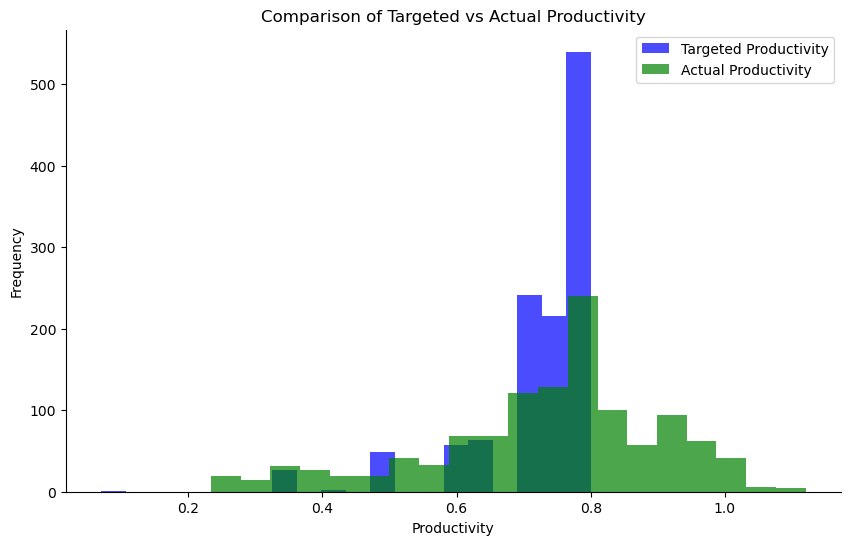

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['targeted_productivity'], bins=20, alpha=0.7, color='blue', label='Targeted Productivity')
plt.hist(df['actual_productivity'], bins=20, alpha=0.7, color='green', label='Actual Productivity')
plt.title('Comparison of Targeted vs Actual Productivity')
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.legend()
sns.despine()
plt.show()

In [21]:
# Create the target column for a classification tree
def categorize_productivity(productivity):
    if productivity < 0.6:
        return 'low'
    elif productivity < 0.8:
        return 'medium'
    else:
        return 'high'

In [22]:
# Create target column
df['target'] = df['actual_productivity'].apply(categorize_productivity)

In [23]:
df.sample(10)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,target
1036,Quarter1,finishing,Tuesday,8,0.75,4.60,3360,0,8.0,0.702778,medium
758,Quarter2,finishing,Saturday,8,0.70,4.15,960,0,8.0,0.725625,medium
69,Quarter1,sweing,Monday,8,0.80,25.90,6780,38,56.5,0.800684,high
857,Quarter3,finishing,Thursday,8,0.70,5.13,1920,0,8.0,0.672135,medium
63,Quarter1,finishing,Monday,4,0.80,3.94,3840,0,16.0,0.893663,high
510,Quarter5,sweing,Thursday,5,0.65,20.79,7080,81,59.0,0.800474,high
44,Quarter1,finishing,Sunday,4,0.80,3.94,6600,0,20.0,0.861679,high
822,Quarter3,sweing,Tuesday,10,0.65,18.22,0,0,49.0,0.302117,low
766,Quarter3,finishing,Sunday,1,0.80,3.94,960,0,8.0,1.120437,high
418,Quarter4,finishing,Sunday,1,0.70,3.94,1440,0,8.0,0.970076,high


* We created the target column 'target' for a classification tree using both 'actual_productivity' columns. We categorized the productivity levels into 'low', 'medium', and 'high' based on specific bins.

In [24]:
# Identify the categorical columns
categorical_columns = ['quarter', 'department', 'day']

In [25]:
df_encoded = pd.get_dummies(df, columns=categorical_columns,  drop_first=True)
df_encoded.sample(10)

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,target,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
601,10,0.80,22.52,6720,113,56.0,0.999995,high,0,0,0,0,1,0,0,0,0,1
680,12,0.80,15.26,4080,63,34.0,0.800402,high,1,0,0,0,1,0,0,0,0,0
55,3,0.75,19.87,6600,45,55.0,0.750243,medium,0,0,0,0,1,0,1,0,0,0
778,8,0.70,4.15,960,0,8.0,0.605208,medium,0,1,0,0,0,0,1,0,0,0
388,8,0.80,40.99,10770,30,56.5,0.555500,low,0,0,1,0,1,0,0,1,0,0
447,1,0.70,22.94,10440,60,58.0,0.800024,high,0,0,1,0,1,0,0,0,0,0
363,11,0.70,14.89,10260,50,57.0,0.700170,medium,0,1,0,0,1,0,0,0,0,1
923,5,0.80,4.60,1080,0,9.0,0.902963,high,0,0,1,0,0,0,0,0,0,1
868,12,0.80,15.26,4080,63,34.0,0.800402,high,0,0,1,0,1,0,1,0,0,0
88,1,0.80,26.16,10620,75,59.0,0.850502,high,0,0,0,0,1,0,0,0,1,0


### Scaling the data

In [26]:
numerical_features = ['smv', 'over_time', 'incentive', 'no_of_workers']

In [27]:
scaler = StandardScaler()

In [28]:
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [29]:
df_encoded.head()

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,target,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,1.014552,0.750589,0.373414,1.099229,0.940725,high,0,0,0,0,1,0,0,1,0,0
1,1,0.75,-1.016778,-1.077682,-0.238643,-1.199268,0.886500,high,0,0,0,0,0,0,0,1,0,0
2,11,0.80,-0.333878,-0.271092,0.073631,-0.185225,0.800570,high,0,0,0,0,1,0,0,1,0,0
3,12,0.80,-0.333878,-0.271092,0.073631,-0.185225,0.800570,high,0,0,0,0,1,0,0,1,0,0
4,6,0.80,0.990783,-0.790895,0.073631,0.964023,0.800382,high,0,0,0,0,1,0,0,1,0,0


## 3. Model Building

In [30]:
# Divide the dataset into features nd target labels
X = df_encoded.drop(columns=['target', 'actual_productivity'],axis=1)
y = df_encoded['target']

In [31]:
# Split the dataset into traning and testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Instantiate a decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3)

In [33]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred = tree_clf.predict(X_test)

In [35]:
tree_score = tree_clf.score(X_test, y_test)
print('Score: ',tree_score)

Score:  0.7541666666666667


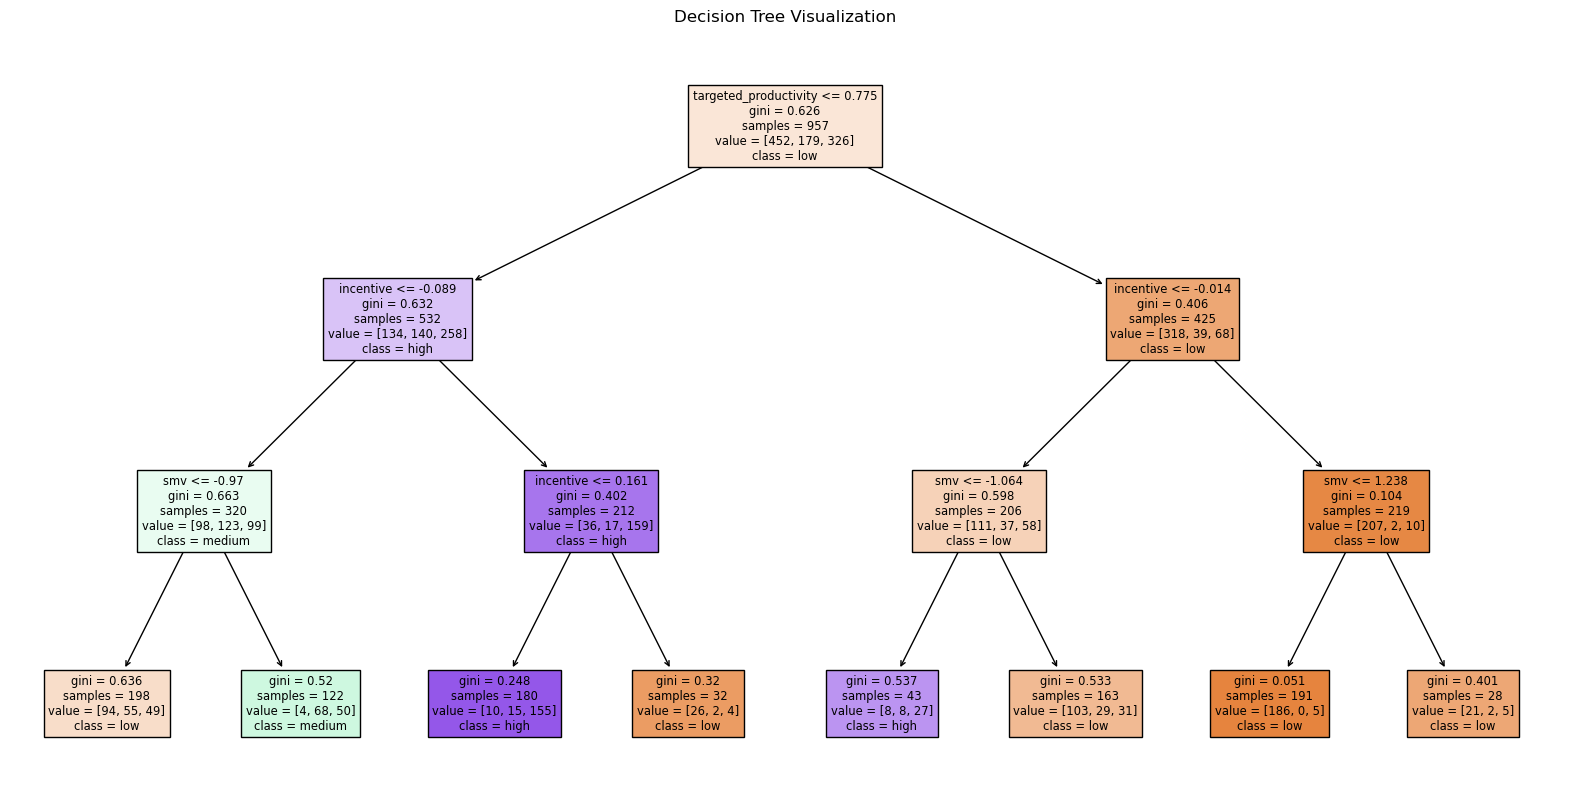

In [36]:
# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X.columns, class_names=['low', 'medium', 'high'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [37]:
# Evaluate the accuracy of the decision tree
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.7541666666666667


In [38]:
# classification report
print('\nClassification Report: ')
print(classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

        high       0.76      0.94      0.84       114
         low       0.53      0.46      0.49        37
      medium       0.84      0.64      0.73        89

    accuracy                           0.75       240
   macro avg       0.71      0.68      0.69       240
weighted avg       0.76      0.75      0.75       240



##### Observations:
* The model shows strong precision and recall for the 'high' and 'medium' productivity classes.
* Overall accuracy of the model is 76%, indicating moderate performance across all classes.
* We can conclude that the model performs relatively well in predicting the 'high' and 'medium' classes but struggles with the 'low' class, as indicated by the lower precision, recall, and F1-score for this class. 

## Explaining the Tree

* Decision trees are like maps guiding us through complex decision-making processes. Picture yourself at a crossroads where you need to choose the best path forward. The decision tree starts with a question: "Is the targeted productivity less than or equal to 0.775?" If yes, it suggests a particular route; if no, it directs you elsewhere.

* Each branch in the decision tree represents a choice based on specific conditions. As you follow the branches, you arrive at conclusions tailored to different scenarios. For example, if the targeted productivity is below 0.775, it indicates the 'low' productivity class.

* The values associated with each decision node offer insights into the data distribution along that path. In this scenario, among 957 samples, 452 are classified as 'low' productivity, 179 as 'medium', and 326 as 'high'. This breakdown helps leaders understand the impact of various factors on productivity outcomes and where to focus improvement efforts.

* By interpreting decision trees, leaders can discern the critical factors influencing productivity and make strategic decisions to optimize processes and resource allocation. With this understanding, they can drive performance improvements and enhance productivity in the garment manufacturing process.

## Using Random Forest

In [39]:
# Instantiate a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [40]:
# Fit the random forest to the traning data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Use the algorithm to predict the test data
y_pred_rf = rf_classifier.predict(X_test)

In [42]:
# Accuracy of the random forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ',accuracy_rf)

Random Forest Accuracy:  0.7666666666666667


### Fine-tune hyperperameter using GridSearchCV

In [43]:
param_grid = {'max_depth' : [3, 5, 7], 'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 4]}

In [44]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv= 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [45]:
print('Best Parameters: ',grid_search.best_params_)

Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [46]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [47]:
# Use the ensemble model to predict the test data
y_pred_rf = best_rf.predict(X_test)

In [48]:
# the accuracy of the ensemble model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy (Random Forest): ',accuracy_rf)

Accuracy (Random Forest):  0.7875


In [49]:
print('Classification Report (Random Forest): ')
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest): 
              precision    recall  f1-score   support

        high       0.84      0.92      0.88       114
         low       0.58      0.51      0.54        37
      medium       0.79      0.73      0.76        89

    accuracy                           0.79       240
   macro avg       0.74      0.72      0.73       240
weighted avg       0.78      0.79      0.78       240



##### Observation:
* Precision: Precision measures the proportion of correctly predicted instances among all instances predicted as a specific class. For 'high' productivity, the precision is relatively high at 83%, indicating that when the model predicts a worker to have high productivity, it is correct about 83% of the time. For 'low' productivity, the precision is lower at 58%, suggesting that the model's predictions for low productivity are less reliable.

* Recall: Recall measures the proportion of correctly predicted instances of a class among all instances that truly belong to that class. The recall for 'high' productivity is relatively high at 93%, indicating that the model effectively identifies workers with high productivity. However, the recall for 'low' productivity is lower at 49%, indicating that the model misses identifying some instances of low productivity.

* F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance. The F1-score for 'high' productivity is 0.88, indicating a good balance between precision and recall. For 'low' productivity, the F1-score is 0.53, suggesting a trade-off between precision and recall.

#### Suggestions:
* To further improve the accuracy of the model we can use advanced machine learning algorithms such as Gradient Boosting Machines(GBM), XGBoost, and LightGBM.